In [1]:
%matplotlib inline

In [2]:
# initialization
from rayoptics.environment import *

from rayoptics.raytr.trace import trace_coddington_fan

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
app = AppManager(None)

# Create a new model

In [5]:
# app.model = open_model(root_pth/"codev/tests/ag_dblgauss.seq")
app.model = OpticalModel()
opm = app.model
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [6]:
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=40.0)
osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[0., -50.0])
osp.spectral_region = WvlSpec([(555.0, 1.0)], ref_wl=0)

In [7]:
opm.radius_mode = True

sm.gaps[0].thi=200.0

sm.add_surface([50.0, 15.0, 1.50, 60.0])
sm.stop_surface = 1
sm.add_surface([-50.0, 65.517241])

In [8]:
opm.update_model()

In [9]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0          -50          0.1         0.25             0          200      1.00000    dummy
 1:           20            0    -0.100585         0.25    0.01002923      9.99027      1.50146    transmit
 2:      18.9951      2.49757    -0.291091     0.224951    0.01002923      65.5172      1.00000    transmit
 3:   -0.0763534      17.2358    -0.291091     0.224951             0            0      1.00000    dummy


In [10]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)

In [11]:
ray, op, wvl = trace(sm, np.array([0.,0.,0.]), np.array([0.,0.1,math.sqrt(0.99)]), wvl)

In [12]:
list_ray(ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000            0     0.000000     0.100000     0.994987       205.45
  1:      0.00000     20.54456       4.4158     0.000000    -0.083840     0.996479       6.4302
  2:      0.00000     20.00545      -4.1766     0.000000    -0.374224     0.927338       75.155
  3:      0.00000     -8.11923            0     0.000000    -0.374224     0.927338            0


In [13]:
s_dfoc, t_dfoc = trace_coddington_fan(opm, RayPkg(ray, op, wvl))
s_dfoc, t_dfoc

(-20.119722572084235, -45.81906916228741)

In [14]:
sm.ifcs[-1].profile.cv = -0.01

In [15]:
ray, op, wvl = trace(sm, np.array([0.,0.,0.]), np.array([0.,0.1,math.sqrt(0.99)]), wvl)

In [16]:
list_ray(ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000            0     0.000000     0.100000     0.994987       205.45
  1:      0.00000     20.54456       4.4158     0.000000    -0.083840     0.996479       6.4302
  2:      0.00000     20.00545      -4.1766     0.000000    -0.374224     0.927338        74.81
  3:      0.00000     -7.99021     -0.31973     0.000000    -0.374224     0.927338            0


In [17]:
s_dfoc, t_dfoc = trace_coddington_fan(opm, RayPkg(ray, op, wvl))
s_dfoc, t_dfoc

(-20.11972257208423, -45.819069162287406)

In [18]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)

In [19]:
cr = RayPkg(*trace_base(opm, [0., 0.], fld, wvl))

In [20]:
list_ray(cr.ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000    -50.00000            0     0.000000     0.242536     0.970143       206.16
  1:      0.00000      0.00000            0     0.000000     0.161533     0.986867       15.139
  2:      0.00000      2.44545    -0.059838     0.000000     0.217771     0.976000        65.74
  3:      0.00000     16.76170      -1.4148     0.000000     0.217771     0.976000            0


In [21]:
s_dfoc, t_dfoc = trace_coddington_fan(opm, cr)
s_dfoc, t_dfoc

(-3.8713988530589654, -7.171380449239289)

In [22]:
s_data = []
t_data = []
field_data = []

In [23]:
for f in np.linspace(0., osp.field_of_view.max_field()[0], num=11):
    fld.y = f
    cr = RayPkg(*trace_base(opm, [0., 0.], fld, wvl))
    s_dfoc, t_dfoc = trace_coddington_fan(opm, cr)
    s_data.append(s_dfoc)
    t_data.append(t_dfoc)
    field_data.append(f)

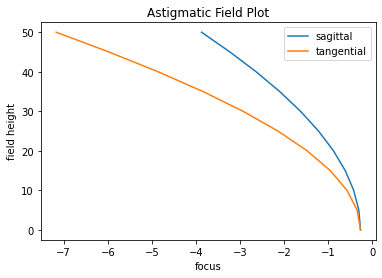

In [24]:
plt.plot(s_data, field_data, label='sagittal')
plt.plot(t_data, field_data, label='tangential')

plt.xlabel('focus')
plt.ylabel('field height')

plt.title("Astigmatic Field Plot")

plt.legend()

plt.show()